In [3]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


In [ ]:
# Ciência de Dados 

# Passo 1 : Entendendo o desafio
# Passo 2 : Entendimento da área / Empresa
# Passo 3 : Extração / Obtençã de dados 
# Passo 4 : Juste de dados Tratamento / Limpeza
# Passo 5 : Análise Exploratória 
# Passo 6 : Modelagem + Algoritmos ( Entrada da Inteligencia Artificial )
# Passo 7 : Interpretação dos Resultados 

In [1]:
# Importa Base de Dados 

import pandas as pd 
tabela = pd.read_csv ('advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


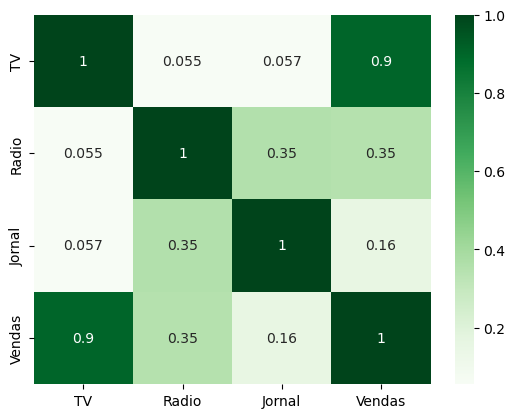

In [6]:
# Analise exploratoria 
import matplotlib.pyplot as plt
import seaborn as sns


print(tabela.corr())

# Grafico 
sns.heatmap(tabela.corr(), cmap='Greens', annot=True)

# Exibir o grafico 
plt.show()

In [11]:
# Separando em dados de treino e dados de rede 

y = tabela['Vendas']
x = tabela [['TV', 'Radio', 'Jornal']]

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y , test_size=0.3)

In [18]:
# Importar I.A

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar I.A

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinando I.A

modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)



RandomForestRegressor()

In [23]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.901674967872255
0.9363525061468427


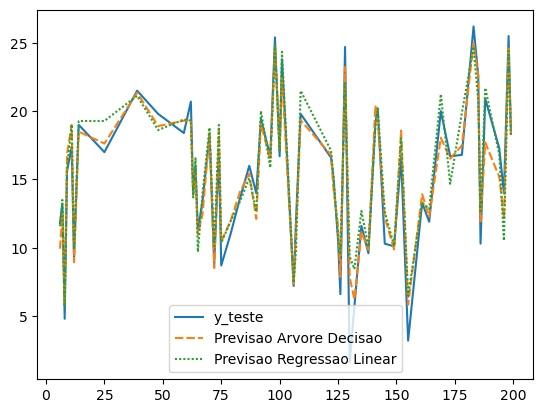

In [26]:
# Previsões Gráficas 
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsao Arvore Decisao'] = previsao_arvoredecisao
tabela_auxiliar['Previsao Regressao Linear'] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show()


In [27]:
nova_tabela = pd.read_csv('novos.csv')
display(nova_tabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [28]:
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

[ 7.639  8.469 19.989]
